In [1]:
# Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("D:\\prep\\resume\\ccfd\\card_transdata.csv")
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [7]:
fraud_df = df[df['fraud'] == 1]
non_fraud_df = df[df['fraud'] == 0]

min_count = min(len(fraud_df), len(non_fraud_df))
min_count


87403

In [9]:
fraud_sample = fraud_df.sample(n=min_count, random_state=42)
non_fraud_sample = non_fraud_df.sample(n=min_count, random_state=42)

data = pd.concat([fraud_sample, non_fraud_sample])

data = data.sample(frac=1, random_state=42).reset_index(drop=True)

print("Balanced dataset created with equal number of fraud and non-fraud rows.")
data

Balanced dataset created with equal number of fraud and non-fraud rows.


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,3.133363,2.880819,15.609338,1.0,1.0,0.0,1.0,1.0
1,0.919648,0.115513,4.307709,0.0,1.0,0.0,1.0,1.0
2,15.161964,0.027713,0.914625,1.0,0.0,0.0,0.0,0.0
3,3.294325,0.700697,1.829264,1.0,0.0,0.0,0.0,0.0
4,76.742356,0.321263,0.177628,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
174801,8.156146,11.474435,1.291911,1.0,1.0,0.0,0.0,0.0
174802,0.810212,0.479408,0.757503,0.0,0.0,1.0,1.0,0.0
174803,29.618415,0.151630,3.483844,1.0,0.0,0.0,1.0,0.0
174804,98.280478,0.802458,2.389608,1.0,1.0,0.0,0.0,0.0


In [10]:
classes = data['fraud'].value_counts()
classes

fraud
1.0    87403
0.0    87403
Name: count, dtype: int64

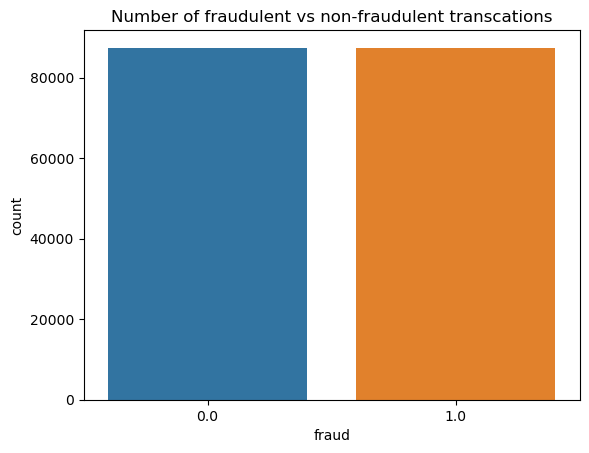

In [12]:
sns.countplot(x='fraud', data=data)
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.show()

## Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rows_to_standardize = data.loc[0:, ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']]
scaled_rows = scaler.fit_transform(rows_to_standardize)
data.loc[0:, ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']] = scaled_rows


In [15]:
data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,-0.394588,-0.146145,2.499086,1.0,1.0,0.0,1.0,1.0
1,-0.415650,-0.218274,0.123344,0.0,1.0,0.0,1.0,1.0
2,-0.280146,-0.220564,-0.589924,1.0,0.0,0.0,0.0,0.0
3,-0.393057,-0.203011,-0.397655,1.0,0.0,0.0,0.0,0.0
4,0.305740,-0.212908,-0.744850,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
174801,-0.346801,0.078007,-0.510614,1.0,1.0,0.0,0.0,0.0
174802,-0.416691,-0.208783,-0.622953,0.0,0.0,1.0,1.0,0.0
174803,-0.142605,-0.217332,-0.049842,1.0,0.0,0.0,1.0,0.0
174804,0.510657,-0.200356,-0.279864,1.0,1.0,0.0,0.0,0.0


In [16]:
data.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

## Train Test Split

In [17]:
from sklearn.model_selection import train_test_split
X = data.drop(['fraud'], axis=1)
y = data['fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [18]:
X_train.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
142954,-0.342901,-0.180239,-0.486516,1.0,0.0,0.0,0.0
108319,-0.009847,-0.220722,1.512454,1.0,0.0,0.0,1.0
66585,-0.272700,-0.216638,0.120517,1.0,0.0,0.0,1.0
46577,5.166782,-0.096232,0.020833,1.0,0.0,0.0,1.0
112886,-0.327211,-0.214177,1.416668,1.0,1.0,0.0,1.0


86373     0.0
43781     1.0
93093     0.0
162027    1.0
64969     1.0
         ... 
56707     1.0
82693     1.0
45733     0.0
38700     1.0
10266     0.0
Name: fraud, Length: 34962, dtype: float64

## Building Model

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [26]:
logistic = LogisticRegression(C=0.01)
logistic_model = logistic.fit(X_train, y_train)
y_train_pred = logistic_model.predict(X_train)

In [27]:
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[64923  4884]
 [ 3590 66447]]


In [28]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94     69807
         1.0       0.93      0.95      0.94     70037

    accuracy                           0.94    139844
   macro avg       0.94      0.94      0.94    139844
weighted avg       0.94      0.94      0.94    139844

